In [1]:
import numpy as np
import math

points = np.random.uniform(low=-10, high=10, size=(100, 2))
points = np.asarray(points)

In [2]:
# x = np.random.uniform(-10, 10, 100)
# 
# points = []
# 
# for i in x:
#     points.append((i,i**2))
# points = np.asarray(points)

In [3]:
points

array([[ 0.02728661,  2.80255904],
       [ 0.56991509,  0.63090605],
       [-4.44229527, -5.05749173],
       [-0.56198633,  3.18509516],
       [-4.04771414, -5.37223759],
       [-0.2611915 , -1.82791316],
       [-5.46575572, -4.6736128 ],
       [ 5.2078164 ,  0.45934411],
       [-0.42116207, -7.1860679 ],
       [-6.61752135,  8.67917815],
       [ 8.81114807,  7.08461852],
       [-5.934674  ,  9.47122333],
       [ 6.32045862, -0.02372023],
       [-6.09176353, -8.32224295],
       [ 3.05504622, -9.11282752],
       [-9.92475281,  5.40368617],
       [ 4.88463705, -1.30961109],
       [-8.51516011,  8.05201334],
       [ 8.32469691,  9.55674465],
       [ 7.72543704,  2.49848934],
       [-0.73047321,  9.09011896],
       [-3.08865565, -4.28151349],
       [-2.05493321, -3.86054425],
       [-0.05097673,  9.72711168],
       [ 8.60494359, -1.98922426],
       [ 9.83944032,  1.08844695],
       [ 1.58649664, -7.20484406],
       [ 0.65179523,  9.83289118],
       [-4.74441219,

In [4]:
np.linalg.norm(points[0,:])

2.8026918697367624

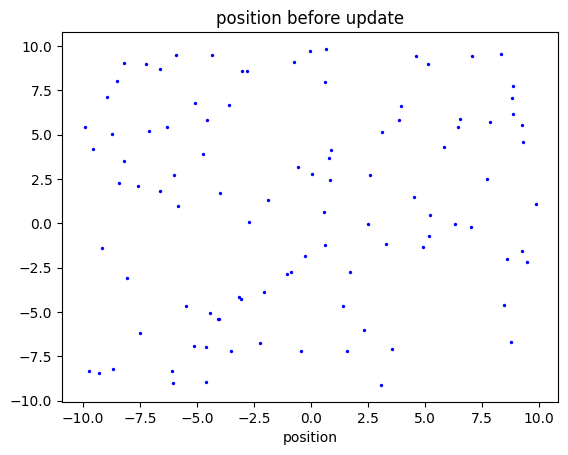

In [5]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=2)

plt.title('position before update')
plt.xlabel('position')
plt.show()

In [6]:
# from scipy.stats import norm
# from scipy.spatial.distance import cdist
# 
# count = 0
# 
# while count < 100:
# 
#     # dens = np.zeros(len(points))
#     dens = []
#     vec = np.zeros((len(points), 2))
# 
#     for i in range(len(points)):
#         sum_pdf = 0
#         vec_total = 0
# 
#         # 여기에 가우시안 넣어야 될듯
#         for num2 in points:
#             if not np.array_equal(points[i], num2):
#                 # gaussian 커널로 점들간 거리에 따라 확률추정
#                 # 이게 벡터의 크기
#                 distance = np.linalg.norm(points[i] - num2)
#                 p = norm.pdf(distance, 0, 1)
#                 # 점 num에서 확률추정
#                 sum_pdf += p
# 
#                 vec_total += p * (points[i] - num2) / distance
# 
#         dens.append(sum_pdf / (len(points)-1))
#         vec[i] = vec_total
# 
#     dens /= np.sum(dens)
#     points += vec
#     count += 1

기울기에 따라 이동하는 방법 필요
어디에다 projection 해야됨??????

In [7]:
from scipy.stats import norm
import numpy as np
from scipy.spatial.distance import cdist

# 가우시안 커널 함수
def gaussian_kernel(x, sigma=1):
    return np.exp(-0.5 * (x / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

count = 0
enp = [float('inf')]

while True:
    diff_matrix = cdist(points, points)
    
    np.fill_diagonal(diff_matrix, np.inf)

    # 가우시안 커널 밀도 계산
    pdf_matrix = gaussian_kernel(diff_matrix)

    # 각 점에서의 밀도 및 벡터 업데이트 계산
    dens = np.sum(pdf_matrix, axis=1) / (len(points) * (len(points) - 1))
    vec = np.sum(pdf_matrix[:, :, np.newaxis] * (points[:, np.newaxis, :] - points[np.newaxis, :, :]) / diff_matrix[:, :, np.newaxis], axis=1)

    # points[:, 1] = points[:, 0] ** 2  # y값을 x^2로 고정

    # 엔트로피 계산
    current_entropy = -np.sum(dens * np.log(dens + 1e-10))  # 확률분포로 정규화한 후 로그 엔트로피 계산

    enp.append(current_entropy)

    # 엔트로피 변화가 매우 작을 때 중지
    if abs(enp[-2] - current_entropy) < 1e-8 and current_entropy == min(enp):
        break

    points += 0.9 * vec  # vec의 크기 조절
    count += 1


11933


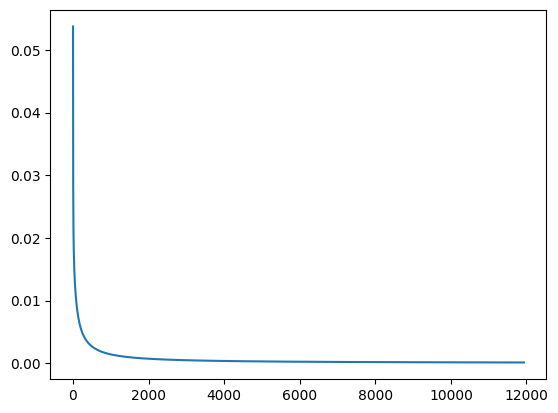

In [8]:
print(len(enp))
plt.plot(enp)

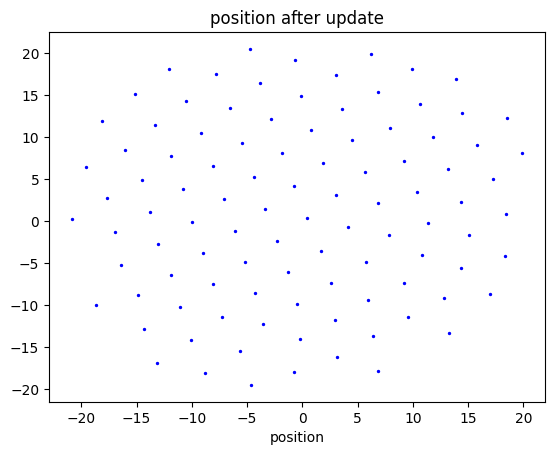

In [9]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=2)

plt.title('position after update')
plt.xlabel('position')
plt.show()

In [10]:
vec

array([[-4.79911015e-06,  2.44415731e-05],
       [-3.74832899e-06, -4.01898289e-06],
       [-5.36100485e-05, -5.04729185e-05],
       [-6.16765522e-06,  5.10857586e-05],
       [-1.36435195e-05, -9.92807977e-05],
       [-2.29716885e-05, -2.03038957e-05],
       [-7.85873415e-05, -4.95286996e-05],
       [ 4.54154564e-05, -4.49196543e-05],
       [ 3.76592720e-05, -1.22250450e-04],
       [-5.55398033e-05,  8.61653128e-05],
       [ 1.13825096e-04,  7.55104294e-05],
       [-3.26339865e-05,  8.32413814e-05],
       [ 5.03211833e-05,  1.25069430e-05],
       [-4.11394000e-05, -9.66227943e-05],
       [ 7.99986586e-05, -1.01516092e-04],
       [-1.02243063e-04,  3.22595690e-05],
       [ 5.77626388e-05, -3.34439292e-05],
       [-6.26995894e-05,  5.91103647e-05],
       [ 8.00438152e-05,  9.58723221e-05],
       [ 7.90076453e-05,  1.41372669e-05],
       [ 2.07052285e-05,  7.81974210e-05],
       [-2.95006719e-05, -6.91720716e-05],
       [-6.01076751e-06, -7.54045762e-05],
       [-4.